### 5. ANN

In [1]:
import numpy as np
X=np.array(([2,9],[1,5],[3,6]),dtype=float)
y=np.array(([92],[86],[89]),dtype=float)
X=X/np.amax(X,axis=0)
y=y/100

def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivatives_sigmoid(x):
    return x*(1-x)

epoch=5000
lr=0.1
wh=np.random.uniform(size=(2,3))
bh=np.random.uniform(size=(1,3))
wout=np.random.uniform(size=(3,1))
bout=np.random.uniform(size=(1,1))

for i in range(epoch):
    hinp=np.dot(X,wh)+bh
    hlayer_act=sigmoid(hinp)
    outinp=np.dot(hinp,wout)+bout
    output=sigmoid(outinp)
    
    hiddengrad=derivatives_sigmoid(hlayer_act)
    outgrad=derivatives_sigmoid(output)
    
    EO=y-output
    d_output=EO*outgrad
    
    EH=d_output.dot(wout.T)
    d_hiddenlayer=EH*hiddengrad
    
    wout += hlayer_act.T.dot(d_output) * lr
    wh += X.T.dot(d_hiddenlayer) * lr
    
print('Input \n'+str(X))
print('Actual output \n'+str(y))
print('Predicted output \n',output)

Input 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output 
[[0.92]
 [0.86]
 [0.89]]
Predicted output 
 [[0.9145145 ]
 [0.84507493]
 [0.91953602]]


### 9. LWR

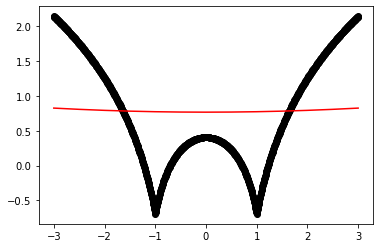

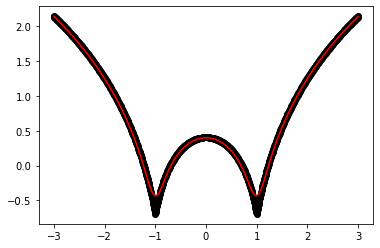

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def local_regression(x0,X,Y,tau):
    x0=[1,x0]
    X=[[1,i] for i in X]
    X=np.asarray(X)
    xw=(X.T)*np.exp(np.sum((X-x0)**2, axis=1)/(-2*(tau**2)))
    beta=(np.linalg.pinv(xw@X)@(xw@Y))
    return (beta@x0)

def draw(tau):
    prediction=[local_regression(x0,X,Y,tau) for x0 in domain]
    plt.plot(X,Y,'o',color='black')
    plt.plot(domain,prediction,color='red')
    plt.show()
    
X=np.linspace(-3,3,num=1000)
domain=X
Y=np.log(np.abs((X**2)-1)+.5)

draw(10)
draw(0.1)

### 1. Astar

In [3]:
def astar(start_node,stop_node):
    open_set=set(start_node)
    closed_set=set()
    g={}
    parents={}
    g[start_node]=0
    parents[start_node]=start_node
    while len(open_set)>0:
        n=None
        for v in open_set:
            if n==None or g[v]+heuristic(v)<g[n]+heuristic(n):
                n=v
        if n==stop_node or graph_nodes[n]==None:
            pass
        else:
            for(m,weight) in get_neighbors(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m]=n
                    g[m]=g[n]+weight
                else:
                    if g[m]>g[n]+weight:
                        g[m]=g[n]+weight
                        parents[m]=n
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)
        if n==None:
            print('No Path')
            return None
        if n==stop_node:
            path=[]
            while parents[n]!=n:
                path.append(n)
                n=parents[n]
            path.append(start_node)
            path.reverse()
            print('Path found:{}'.format(path))
            return path
        open_set.remove(n)
        closed_set.add(n)
    print('No Path')
    return None

def get_neighbors(v):
    if v in graph_nodes:
        return graph_nodes[v]
    else:
        return None

def heuristic(n):
    H_dist={
        'A': 10,
        'B': 6,
        'C': 99,
        'D': 1,
        'E': 7,
        'G': 0,
    }
    return H_dist[n]

graph_nodes={
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1),('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],
}

astar('A','G')

Path found:['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

### 7. Kmeans vs EM

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


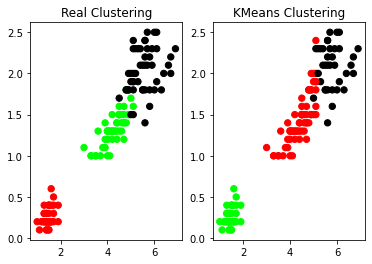

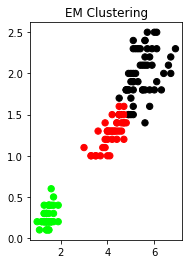

Actual Target 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
KMeans 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
EM 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy Score of KMeans is  0.24

Accuracy Score of

In [4]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris=datasets.load_iris()

X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y=pd.DataFrame(iris.target)
Y.columns=['Targets']

print(X)
print(Y)
colormap=np.array(['red','lime','black'])

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y.Targets],s=40)
plt.title('Real Clustering')

model1=KMeans(n_clusters=3)
model1.fit(X)

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model1.labels_],s=40)
plt.title('KMeans Clustering')
plt.show()

model2=GaussianMixture(n_components=3)
model2.fit(X)

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model2.predict(X)],s=40)
plt.title('EM Clustering')
plt.show()

print('Actual Target \n',iris.target)
print('KMeans \n',model1.labels_)
print('EM \n',model2.predict(X))
print('Accuracy Score of KMeans is ',sm.accuracy_score(Y,model1.labels_))
print('\nAccuracy Score of EM is ',sm.accuracy_score(Y,model2.predict(X)))

### 8. KNN

In [5]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()
print('Iris Dataset Loaded......')

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.1)

for i in range(len(iris.target_names)):
    print('Label', i, '- ',str(iris.target_names[i]))
    
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

for r in range(0,len(X_test)):
    print('Sample: ',str(X_test[r]), 'Actual-Label: ',str(y_test[r]), 'Predicted-Label: ',str(y_pred[r]))
    print("Classification Accuracy: ",classifier.score(X_test,y_test))

Iris Dataset Loaded......
Label 0 -  setosa
Label 1 -  versicolor
Label 2 -  virginica
Sample:  [5.1 3.5 1.4 0.2] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [4.9 2.4 3.3 1. ] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [5.8 2.7 5.1 1.9] Actual-Label:  2 Predicted-Label:  2
Classification Accuracy:  1.0
Sample:  [6.3 3.3 4.7 1.6] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [5.5 2.6 4.4 1.2] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [5.3 3.7 1.5 0.2] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [5.  3.  1.6 0.2] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [5.8 2.7 4.1 1. ] Actual-Label:  1 Predicted-Label:  1
Classification Accuracy:  1.0
Sample:  [4.4 2.9 1.4 0.2] Actual-Label:  0 Predicted-Label:  0
Classification Accuracy:  1.0
Sample:  [4.5 2.3 1.3 0.3] Actual-Label:  0 Predicted-Label:  0
Cla

### 3. Candidate Elimination

In [10]:
import csv
with open('trainingexamples.csv') as f:
    csv_file=csv.reader(f)
    data=list(csv_file)
    specific=data[1][:-1]
    general=[['?' for i in range(len(specific))] for j in range(len(specific))]
    
    for i in data:
        if i[-1]=='Y':
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j]='?'
                    general[j][j]='?'
        elif i[-1]=='N':
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j]=specific[j]
                else:
                    general[j][j]='?'
                    
        print('\n Step'+str(data.index(i)+1)+'of Candidate elimination algorithm')
        print(specific)
        print(general)
        
    gh=[]
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    
    print('\nFinal Specific Hypothesis: ',specific)
    print('\nFinal General Hypothesis: ',gh)


 Step1of Candidate elimination algorithm
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', 'Normal', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]

 Step2of Candidate elimination algorithm
['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', 'Normal', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]

 Step3of Candidate elimination algorithm
['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'Same']]

 Step4of Candidate elimination algorithm
['Sunny', 'Warm', '?', 'Strong', '?', '?']
[['Sunny', '?

### 2. AO Star

In [10]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode): 
        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
        
    def applyAOStar(self): 
        self.aoStar(self.start, False)
        
    def getNeighbors(self, v): 
        return self.graph.get(v,'')
    
    def getStatus(self,v): 
        return self.status.get(v,0)
    
    def setStatus(self,v, val): 
        self.status[v]=val
        
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0) 
    
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value 
        
    def printSolution(self):
        print("For Graph solution, Traverse graph from Startnode: ",self.start)
        print("----------------------------------------------------")
        print(self.solutionGraph)
        print("----------------------------------------------------")
        
    def computeMinimumCostChildNodes(self, v): 
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v): 
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)
            if flag==True: 
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList 
                flag=False
            else:
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList 

        return minimumCost, costToChildNodeListDict[minimumCost] 
    
    def aoStar(self, v, backTracking): 
        print("HEURISTIC VALUES :", self.H)
        print("SOLUTION GRAPH :", self.solutionGraph)
        print("PROCESSING NODE :", v)
        print("----------------------------------------------------")
        if self.getStatus(v) >= 0: 
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v,len(childNodeList))
            solved=True 
            for childNode in childNodeList:
                self.parent[childNode]=v
                if self.getStatus(childNode)!=-1:
                    solved=solved & False
            if solved==True: 
                self.setStatus(v,-1)
                self.solutionGraph[v]=childNodeList
            if v!=self.start:
                self.aoStar(self.parent[v], True) 
            if backTracking==False: 
                for childNode in childNodeList: 
                    self.setStatus(childNode,0) 
                    self.aoStar(childNode, False) 

h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]
}
G1= Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()

HEURISTIC VALUES : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
----------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : B
----------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : A
----------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : G
----------------------------------------------------
HEURISTIC VALUES : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 8, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH : {}
PROCESSING NODE : B
---------------------------------------

### 6. Bayesian Classifier

In [37]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv('tennis.csv')
print(data.head())

X=data.iloc[:, :-1]
print(X.head())
y=data.iloc[: ,-1]
print(y.head())

le_Outlook=LabelEncoder()
X.Outlook=le_Outlook.fit_transform(X.Outlook)

le_Temperature=LabelEncoder()
X.Temperature=le_Temperature.fit_transform(X.Temperature)

le_Humidity=LabelEncoder()
X.Humidity=le_Humidity.fit_transform(X.Humidity)

le_Wind=LabelEncoder()
X.Wind=le_Wind.fit_transform(X.Wind)

print('Train data\n',X.head())

le_PlayTennis=LabelEncoder()
y=le_PlayTennis.fit_transform(y)

print('Train output\n',y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_pred,y_test))

    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
    Outlook Temperature Humidity    Wind
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak
0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object
Train data
    Outlook  Temperature  Humidity  Wind
0        2            1         0     1
1        2            1         0     0
2        0            1         0     1
3        1            2         0     1
4        1            0         1     1
Train output
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Accuracy Score:  0.6666666666666666


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### 4. ID3

In [13]:
import pandas as pd
from pprint import pprint
from sklearn.feature_selection import mutual_info_classif
from collections import Counter

def id3(df, target_attribute, attribute_names, default_class=None):
    cnt=Counter(x for x in df[target_attribute])
    if len(cnt)==1:
        return next(iter(cnt))
    
    elif df.empty or (not attribute_names):
         return default_class

    else:
        gainz = mutual_info_classif(df[attribute_names],df[target_attribute],discrete_features=True)
        index_of_max=gainz.tolist().index(max(gainz))
        best_attr=attribute_names[index_of_max]
        tree={best_attr:{}}
        remaining_attribute_names=[i for i in attribute_names if i!=best_attr]
        
        for attr_val, data_subset in df.groupby(best_attr):
            subtree=id3(data_subset, target_attribute, remaining_attribute_names,default_class)
            tree[best_attr][attr_val]=subtree
        
        return tree
    

df=pd.read_csv("tennis.csv")

attribute_names=df.columns.tolist()
print("List of attribut name")

attribute_names.remove("PlayTennis")

for colname in df.select_dtypes("object"):
    df[colname], _ = df[colname].factorize()
    
print(df)

tree= id3(df,"PlayTennis", attribute_names)
print("The tree structure")
pprint(tree)

List of attribut name
    Outlook  Temperature  Humidity  Wind  PlayTennis
0         0            0         0     0           0
1         0            0         0     1           0
2         1            0         0     0           1
3         2            1         0     0           1
4         2            2         1     0           1
5         2            2         1     1           0
6         1            2         1     1           1
7         0            1         0     0           0
8         0            2         1     0           1
9         2            1         1     0           1
10        0            1         1     1           1
11        1            1         0     1           1
12        1            0         1     0           1
13        2            1         0     1           0
The tree structure
{'Outlook': {0: {'Humidity': {0: 0, 1: 1}}, 1: 1, 2: {'Wind': {0: 1, 1: 0}}}}
